In [1]:
import Functions as F 
results = "results/results03.csv"
nr_agents = 6
nr = 14
Viz = F.VisualizeAngle(results, nr_agents)
Viz.get_coor()
Viz.plot_angle_in_plane(nr, True)

In [2]:
%matplotlib qt 
rotation_ann = Viz.R_ann
rotation_model = Viz.R_model 
Dij = F.Dijkstras(results, nr_agents, nr, rotation_ann, rotation_model)
Dij.run_dijkstra(6, 26)

In [6]:
Dij.plot_both()

## Plot path on top of image

In [1]:
import SimpleITK as sitk 
import numpy as np 
import os 
import matplotlib.pyplot as plt 

In [2]:
facial_paths = os.listdir("paths/paths_facial")
itkimage = sitk.ReadImage("Cmarl/src/data/images/Data_good_Scaled/" + facial_paths[0][6:])

origin = np.array(list(reversed(itkimage.GetOrigin())))
spacing = np.array(list(reversed(itkimage.GetSpacing())))
itkimage.SetOrigin(origin)
itkimage.SetSpacing(spacing)

mask = sitk.GetArrayFromImage(sitk.ReadImage("paths/paths_facial/" + facial_paths[0]))
im = sitk.GetArrayFromImage(itkimage)
mask = np.transpose(mask, [0, 2, 1])
im[mask == 1] = 500 

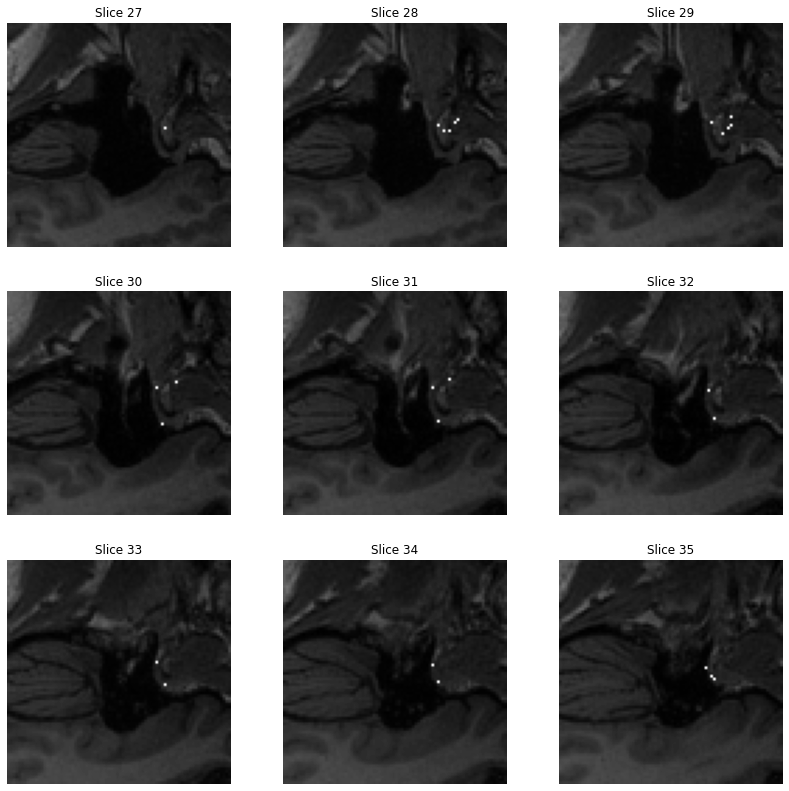

In [3]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))
ax = ax.flatten()
for i in range(3 * 3): 
    ax[i].imshow(im[0:80, 15:95, i + 27], cmap = "gray")
    ax[i].set_title(f"Slice {i + 27}")
    ax[i].axis("off")
plt.show()

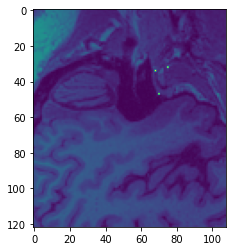

In [6]:

plt.imshow(im[:, :, 30])